# Project 3: Airbnb
**This is the third of three mandatory projects to be handed in as part of the assessment for the course 02807 Computational Tools for Data Science at Technical University of Denmark, autumn 2019.**

#### Practical info
- **The project is to be done in groups of at most 3 students**
- **Each group has to hand in _one_ Jupyter notebook (this notebook) with their solution**
- **The hand-in of the notebook is due 2019-12-05, 23:59 on DTU Inside**

#### Your solution
- **Your solution should be in Python/PySpark**
- **For each question you may use as many cells for your solution as you like**
- **You should not remove the problem statements**
- **Your notebook should be runnable, i.e., clicking [>>] in Jupyter should generate the result that you want to be assessed**
- **You are not expected to use machine learning to solve any of the exercises**

# Introduction
[Airbnb](http://airbnb.com) is an online marketplace for arranging or offering lodgings. In this project you will use Spark to analyze data obtained from the Airbnb website. The purpose of the analysis is to extract information about trends and patterns from the data.

The project has two parts.

### Part 1: Loading, describing and preparing the data
There's quite a lot of data. Make sure that you can load and correctly parse the data, and that you understand what the dataset contains. You should also prepare the data for the analysis in part two. This means cleaning it and staging it so that subsequent queries are fast.

### Par 2: Analysis
In this part your goal is to learn about trends and usage patterns from the data. You should give solutions to the tasks defined in this notebook, and you should use Spark to do the data processing. You may use other libraries like for instance Pandas and matplotlib for visualisation.

## Guidelines
- Processing data should be done using Spark. Once data has been reduced to aggregate form, you may use collect to extract it into Python for visualisation.
- Your solutions will be evaluated by correctness, code quality and interpretability of the output. This means that you have to write clean and efficient Spark code that will generate sensible execution plans, and that the tables and visualisations that you produce are meaningful and easy to read.
- You may add more cells for your solutions, but you should not modify the notebook otherwise.

### Create Spark session and define imports

In [1]:
from pyspark.sql import *
from pyspark.sql import functions as f
from pyspark.sql.types import *

spark = SparkSession.builder.appName("Project3").getOrCreate()

# Part 1: Loading, describing and preparing the data
The data comes in two files. Start by downloading the files and putting them in your `data/` folder.

- [Listings](https://files.dtu.dk/u/siPzAasj8w2gI_ME/listings.csv?l) (5 GB)
- [Reviews](https://files.dtu.dk/u/k3oaPYp6GjKBeho4/reviews.csv?l) (9.5 GB)

### Load the data
The data has multiline rows (rows that span multiple lines in the file). To correctly parse these you should use the `multiline` option and set the `escape` character to be `"`.

To load the data, we firstly took a look at it to see if we had to add any option besides the one indicated.
Then we loaded the two files in two different dataframes, using the options that we had agreed upon.

In [4]:
listings = spark.read.option('header', True).option('delimiter', ',').option('inferSchema', False)\
            .option('multiline', True).option('escape','"').csv('/Users/enriqueqs/Docker/work/data/listings.csv')
reviews = spark.read.option('header', True).option('delimiter', ',').option('inferSchema', False)\
            .option('multiline', True).option("escape",'"').csv('/Users/enriqueqs/Docker/work/data/reviews.csv')

---

### Describe the data
List the features (schema) and sizes of the datasets.

First, we describe the *listings* dataset:

In [5]:
listings.printSchema()

root
 |-- id: string (nullable = true)
 |-- listing_url: string (nullable = true)
 |-- scrape_id: string (nullable = true)
 |-- last_scraped: string (nullable = true)
 |-- name: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- space: string (nullable = true)
 |-- description: string (nullable = true)
 |-- experiences_offered: string (nullable = true)
 |-- neighborhood_overview: string (nullable = true)
 |-- notes: string (nullable = true)
 |-- transit: string (nullable = true)
 |-- access: string (nullable = true)
 |-- interaction: string (nullable = true)
 |-- house_rules: string (nullable = true)
 |-- thumbnail_url: string (nullable = true)
 |-- medium_url: string (nullable = true)
 |-- picture_url: string (nullable = true)
 |-- xl_picture_url: string (nullable = true)
 |-- host_id: string (nullable = true)
 |-- host_url: string (nullable = true)
 |-- host_name: string (nullable = true)
 |-- host_since: string (nullable = true)
 |-- host_location: string (nullable

Apart from the fact that there are a lot of columns, we noticed that some of them were redondant, and we would see later in the project that most of them are not useful.

---

We then describe the *reviews* dataset:

In [6]:
reviews.printSchema()

root
 |-- listing_id: string (nullable = true)
 |-- id: string (nullable = true)
 |-- date: string (nullable = true)
 |-- reviewer_id: string (nullable = true)
 |-- reviewer_name: string (nullable = true)
 |-- comments: string (nullable = true)



The *reviews* dataset is much more compact, and we could guess that most the columns would be useful just by looking at their names.

### Prepare the data for analysis
You should prepare two dataframes to be used in the analysis part of the project. You should not be concerned with cleaning the data. There's a lot of it, so it will be sufficient to drop rows that have bad values. You may want to go back and refine this step at a later point when doing the analysis.

You may also want to consider if you can stage your data so that subsequent processing is more efficient (this is not strictly necessary for Spark to run, but you may be able to decrease the time you sit around waiting for Spark to finish things).

To make our work more efficient and spend less time sitting around, we firstly set up a new repartition of our files.
By trying different values, we found that for our computers and these files, splitting the file in 12 was a good solution.

In [7]:
listings_rep=listings.repartition(12)
reviews_rep=reviews.repartition(100)
reviews_sample = reviews_rep.sample(False, 0.1,111).cache()

The following part was written at the end of the project, when we knew which column we would use, for better readability:

In [6]:
listings_rep.drop('listing_url','scrape_id','last_scraped','summary','experiences_offered','neighborhood_overview',
                  'notes','transit','access','interaction','house_rules','thumbnail_url','medium_url','picture_url',
                  'xl_picture_url', 'host_url','host_name','host_since','host_location','host_about','host_response_time',
                 'host_response_rate','host_acceptance_rate','host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
                 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic',
                  'host_identity_verified', 'street', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude',
                  'is_location_exact', 'bed_type', 'amenities', 'security_deposit', 'cleaning_fee', 'guests_included', 
                  'extra_people', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
                  'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
                  'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90',
                  'availability_365', 'calendar_last_scraped', 'first_review', 'last_review', 'review_scores_accuracy',
                  'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                'requires_license', 'license', 'jurisdiction_names', 'instant_bookable', 'is_business_travel_ready', 
                  'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count',
                  'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
                  'calculated_host_listings_count_shared_rooms', 'reviews_per_month')

DataFrame[id: string, name: string, space: string, description: string, host_id: string, neighbourhood: string, neighbourhood_cleansed: string, neighbourhood_group_cleansed: string, city: string, state: string, zipcode: string, property_type: string, room_type: string, accommodates: string, bathrooms: string, bedrooms: string, beds: string, square_feet: string, price: string, weekly_price: string, monthly_price: string, number_of_reviews: string, number_of_reviews_ltm: string, review_scores_rating: string, review_scores_value: string]

As the data set was large enough to disregard the bad values, we simply drop all the na values:

In [7]:
listings_rep.dropna()
listings_rep.na.drop()

reviews_rep.dropna()
reviews_rep.na.drop()

DataFrame[listing_id: string, id: string, date: string, reviewer_id: string, reviewer_name: string, comments: string]

After doing all this, we thought that we could dive straight into the analysis.

# Part 2: Analysis
Use Spark and your favorite tool for data visualization to solve the following tasks.

## The basics
Compute and show a dataframe with the number of listings and neighbourhoods per city..


As the title of this part sugests, it is pretty straight forward and, except renaming the columns for readability purpose, we strictly do what is asked : show the listings dataframe with the number of listings and neighbourhoods per city:

In [8]:
citynl = listings_rep.groupBy('city').agg(f.countDistinct('neighbourhood_cleansed')\
        .alias('count_neighourhood'), f.countDistinct('id').alias('listings'))\
        .orderBy(f.desc('listings'))

In [9]:
citynl.show()

+-----------------+------------------+--------+
|             city|count_neighourhood|listings|
+-----------------+------------------+--------+
|            Paris|                20|   17416|
|   Greater London|                33|   15946|
|          Beijing|                16|   14445|
|   Rio de Janeiro|               142|   10161|
|           London|                32|    9519|
|        Cape Town|                80|    8503|
|      Los Angeles|               129|    7325|
|             Roma|                16|    6949|
|           Madrid|               126|    6219|
|         New York|                77|    6119|
|           Berlin|               134|    6033|
|        Barcelona|                73|    5719|
|Ciudad de MÃ©xico|                16|    5709|
|           Milano|                81|    5473|
|          Toronto|               138|    5419|
|         Brooklyn|                52|    5097|
|       KÃ¸benhavn|                11|    4958|
|        MontrÃ©al|                23|  

Based on the table above, you should choose a city that you want to continue your analysis for. The city should have mulitple neighbourhoods with listings in them.

---

##### Since we love pizza and pasta, we chose Roma.
Now is the time to look more closely at the data concerning the city of Roma.
As most of the following queries will concern the city, we built a dataframe that only concerns Roma and the data we are interested in:

In [12]:
roma = listings_rep.filter(f.col('city')=='Roma').select('id','neighbourhood_cleansed','property_type'
                                                        ,'review_scores_rating','price','reviews_per_month')

In [13]:
roma = roma.cache()

---

Compute and visualize the number of listings of different property types per neighbourhood in your city.

In [12]:
roma.groupBy('neighbourhood_cleansed','property_type')\
    .agg(f.countDistinct('id').alias('listings')).orderBy(f.desc('listings')).show()

+----------------------+------------------+--------+
|neighbourhood_cleansed|     property_type|listings|
+----------------------+------------------+--------+
|      I Centro Storico|         Apartment|    9309|
|  VII San Giovanni/...|         Apartment|    1595|
|  II Parioli/Nomentano|         Apartment|    1430|
|          XIII Aurelia|         Apartment|    1227|
|      I Centro Storico| Bed and breakfast|    1182|
|       XII Monte Verde|         Apartment|     976|
|  V Prenestino/Cent...|         Apartment|     815|
|      I Centro Storico|       Condominium|     679|
|     VIII Appia Antica|         Apartment|     543|
|      I Centro Storico|Serviced apartment|     530|
|      I Centro Storico|              Loft|     397|
|       XIV Monte Mario|         Apartment|     377|
|          IV Tiburtina|         Apartment|     373|
|      I Centro Storico|    Boutique hotel|     333|
|  XI Arvalia/Portuense|         Apartment|     330|
|      I Centro Storico|             House|   

As we are sorting by descending number of listings, we can see that most of them are apartements, although there seems to be quite some choice in the property type.

---

## Prices
Compute the minimum, maximum and average listing price in your city. 

As always, to work on prices, we have to deal with format differences so the first step is always to transform the prices to a standard format.
We also import additional libraries for plotting.

In [13]:
from pyspark.sql.types import DoubleType
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#we want to make sure that the prices are on the right format
def pricetofloat(price):
    price=price.replace(',','')
    price=price.replace('$','')
    return float(price)

In [52]:
pricefunc = f.udf(pricetofloat)
roma_prices = roma.withColumn('price_double', pricefunc(f.col('price')).cast(DoubleType()))

# we filter the prices equal to 0.0, given that that does not exist and that we have enough data.

roma_prices = roma_prices.filter(f.col('price_double')!=0.0)

After having filtered the prices, we compute the three basic aggregates for our city:

In [15]:
roma_prices.agg(f.min('price_double').alias('minimum'), f.max('price_double').alias('maximum'), f.avg('price_double').alias('average')).show()

+-------+-------+------------------+
|minimum|maximum|           average|
+-------+-------+------------------+
|    8.0|11818.0|101.36202751172598|
+-------+-------+------------------+



The most striking fact that comes with these aggregates is that the scode of the price is immense : we wouldn't have expected it to be more than 10 000$ for sure.

---

Compute and visualize the distribution of listing prices in your city.

Here, we get the value at the 97% quantile, which we take approximately to make the execution faster
We chose this quantile value to remove outliers and get a more representative histogram of the prices.

In [16]:
upper_price=roma_prices.approxQuantile('price_double',[0.97],0.01)

In [17]:
float(upper_price[0])

399.0

Now that we know that 97% of the prices are below 399$, we can filter them out to get our nice graph:

In [18]:
prices_roma = roma_prices.filter(f.col('price_double')<float(upper_price[0])).orderBy(f.asc('price_double'))
rows = prices_roma.collect()
prices_list = list(map(lambda r: r['price_double'], rows))

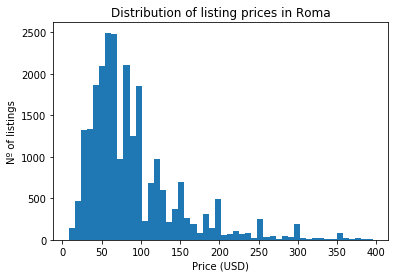

In [19]:
plt.hist(prices_list, bins=50)
plt.xlabel("Price (USD)")
plt.ylabel("Nº of listings")
plt.title("Distribution of listing prices in Roma")
plt.show()

The distribution is about what we could have expected: a kind of normal distribution, that is stretched out to higher prices

---

Another way to visualise it is to use a boxplot, in order to visualize the 25% and 75% quantile, aswell as the median:

{'whiskers': [<matplotlib.lines.Line2D at 0x1fe3c1f3748>,
 'caps': [<matplotlib.lines.Line2D at 0x1fe3c1f3e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fe3c1f3358>],
 'medians': [<matplotlib.lines.Line2D at 0x1fe3c1fb518>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fe3c1fb860>],
 'means': []}

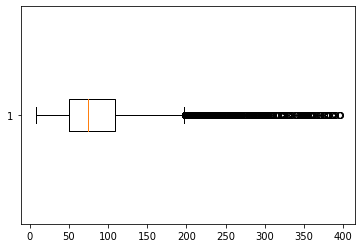

In [20]:
plt.boxplot(prices_list, vert=False)

Here, the black part represent the outliers. There are only outliers in the higher prices, as we could have guessed with the distribution.

---

The value of a listing is its rating divided by its price.

Compute and show a dataframe with the 3 highest valued listings in each neighbourhood.

To get the value of the listings, and especially to get the 3 highest valued listings in each neighbourhood, we need to use "advanced" Spark features, notably the window function that considers each group as a specific dataframe.

In [21]:
roma_value = roma_prices.filter(f.col('review_scores_rating').isNotNull())\
            .withColumn('review_scores_rating_double', f.col('review_scores_rating').cast(DoubleType()))        

In [22]:
roma_value = roma_value.na.drop(subset=['review_scores_rating'])
roma_value.dropna()

DataFrame[id: string, neighbourhood_cleansed: string, property_type: string, review_scores_rating: string, price: string, reviews_per_month: string, price_double: double, review_scores_rating_double: double]

In [23]:
roma_value = roma_value.withColumn('listing_value', 
                                  (f.col('review_scores_rating_double')/f.col('price_double')))

In [24]:
sorted_by_value = Window.partitionBy('neighbourhood_cleansed').orderBy(f.desc('listing_value'))

ranked_value = roma_value.withColumn('NeighValRank', f.rank().over(sorted_by_value))
ranked_value.filter(f.col('NeighValRank') <= 3).orderBy('neighbourhood_cleansed', f.desc('listing_value'))\
        .select(f.col('id'),f.col('neighbourhood_cleansed'),f.col('listing_value'),f.col('NeighValRank')).show()

+--------+----------------------+-----------------+------------+
|      id|neighbourhood_cleansed|    listing_value|NeighValRank|
+--------+----------------------+-----------------+------------+
|24074850|      I Centro Storico|             11.5|           1|
|23995680|      I Centro Storico|10.11111111111111|           2|
|26277392|      I Centro Storico| 9.11111111111111|           3|
|13996664|  II Parioli/Nomentano|              9.9|           1|
|37740563|  II Parioli/Nomentano|7.142857142857143|           2|
|36806604|  II Parioli/Nomentano|6.666666666666667|           3|
|21875866|  II Parioli/Nomentano|6.666666666666667|           3|
|27770661|       III Monte Sacro|7.538461538461538|           1|
|28181891|       III Monte Sacro|             7.25|           2|
|27516839|       III Monte Sacro|7.142857142857143|           3|
|35512107|          IV Tiburtina|              7.5|           1|
|34384771|          IV Tiburtina|7.083333333333333|           2|
|26060047|          IV Ti

We can see that globaly, the historical center, which is the neighbourhood with the largest amount of listings, also has the highest listing values.

## Trends
Now we want to analyze the "popularity" of your city. The data does not contain the number of bookings per listing, but we have a large number of reviews, and we will assume that this is a good indicator of activity on listings.

In this part, the first challenge is that we have to work with both reviews and listings, and another one would be that we are working over time and not in total, so we need to have a finer analysis.

Compute and visualize the popularity (i.e., number of reviews) of your city over time.

In [25]:
reviews_rep=reviews_rep.select(f.col('listing_id'), f.col('id').alias('id_'), f.col('date'),f.col('reviewer_id'),
                    f.col('reviewer_name'), f.col('comments'))

To link the reviews with the different listings, we join the two tables to create a new dataframe. As the dataframe roma contains less than 100 000 listings and thus less than 100 000 rows whereas reviews is 10Gb, we broadcast roma to gain efficiency.

In [26]:
reviews_roma=reviews_rep.join(f.broadcast(roma), f.col('listing_id') == f.col('id'), 'inner')\
    .drop('property_type','review_scores_rating','price','reviews_per_month', 'reviewer_id','reviewer_name')

To improve performance again, we cache roma's review dataframe as we are going to do many queries with that dataframe.

In [28]:
reviews_roma.cache()

DataFrame[listing_id: string, id_: string, date: string, comments: string, id: string, neighbourhood_cleansed: string]

To know the boundaries of our plot, we compute aggregates on the date:

In [29]:
#reviews_roma.agg(f.min('date'),f.max('date')).show()

In [30]:
reviews_roma=reviews_roma.select('id',f.to_date(reviews_roma.date, 'yyyy-MM-dd').alias('date'), 'neighbourhood_cleansed','comments')

Here, we sorted the reviews by date in order to have a plot that showed evolution over time.
To make the plotting easier, we converted the dataframe to Panda's and then finally plotted with matplotlib.

In [31]:
reviews_roma_historically = reviews_roma.select(f.date_format(reviews_roma.date,'yyyy-MM').alias('month')).groupby('month').count().sort(f.asc("month"))

reviews_roma_historically_pd = reviews_roma_historically.select("*").toPandas()

#df.select(F.date_format('timestamp','yyyy-MM').alias('month')).groupby('month').count().show()


<BarContainer object of 112 artists>

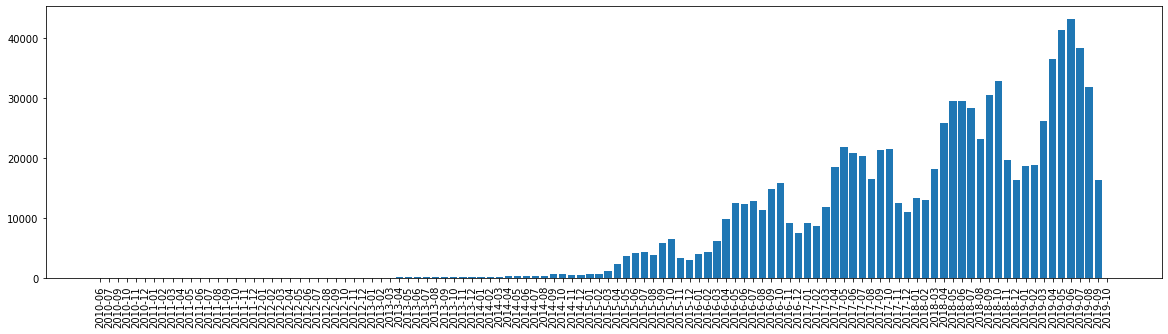

In [32]:
plt.figure(figsize= [20, 5])
plt.xticks(rotation='vertical')
plt.bar(reviews_roma_historically_pd['month'],reviews_roma_historically_pd['count'])

On this graph, we can see a global upgoing trend aswell as the seasonal variation that we are going to study next.

---

Compute and visualize the popularity of neighbourhoods over time. If there are many neighbourhoods in your city, you should select a few interesting ones for comparison.

In [33]:
reviews_roma_historically_neigh=reviews_roma.groupBy(f.date_format(reviews_roma.date,'yyyy-MM').alias('month'),'neighbourhood_cleansed')\
.agg(f.countDistinct('id').alias('reviews')).orderBy(f.asc('month'))

reviews_roma_historically_neigh_pd=reviews_roma_historically_neigh.toPandas()

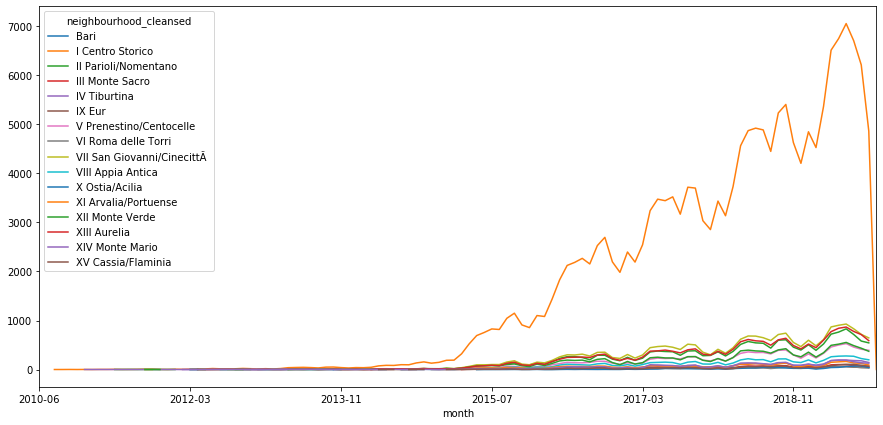

In [34]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
reviews_roma_historically_neigh_pd.groupby(['month','neighbourhood_cleansed']).sum()['reviews'].unstack().plot(ax=ax)

We chose to plot most neighbourhoods in order to see the difference between the different group of neighbourhoods that appear from this plot:
The historical centre that is clearly out of the crowd, then three neighbourhoods (II, III and VII) being very close, and finally the rest being very small compared to those.

---

Compute and visualize the popularity of your city by season. For example, visualize the popularity of your city per month.

<BarContainer object of 12 artists>

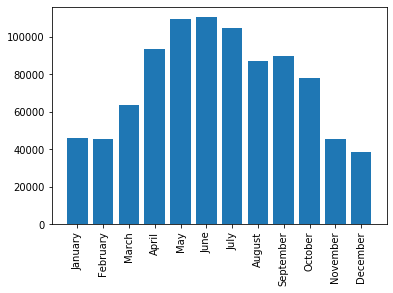

In [35]:

month_lst = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
             'August', 'September', 'October', 'November', 'December']
permonth = reviews_roma.select(f.month('date').alias('permonth')).groupby('permonth').count().sort(f.asc("permonth"))
permonth_pd=permonth.select("*").toPandas()
plt.xticks(rotation='vertical')
plt.bar(month_lst,permonth_pd['count'])




Here, we can clearly see that for Roma, spring and summer are the most popular seasons. We expected August to be higher as southern cities are usually very popular in the two summer holidays months, but it turns out that more reviews are made in September.

---

## Reviews
In this part you should determine which words used in reviews that are the most positive. 

The individual reviews do not have a rating of the listing, so we will assume that each review gave the average rating to the listing, i.e., the one on the listing.

You should assign a positivity weight to each word seen in reviews and list the words with the highest weight. It is up to you to decide what the weight should be. For example, it can be a function of the rating on the listing on which it occurs, the number of reviews it occurs in, and the number of unique listings for which it was used to review.

Depending on your choice of weight function, you may also want to do some filtering of words. For example, remove words that only occur in a few reviews.

---

First, we set up the reviews dataframe to improve performance and rename columns to make the future join clearer:

In [8]:
reviews_samp = reviews_rep.sample(False, 0.1, 111).cache()

In [10]:
reviews_samp = reviews_samp.select(f.col('id').alias('review_id'), f.col('listing_id'), f.col('reviewer_id'), f.col('comments'))

Then, we join the reviews with our roma Dataframe, doing a broadcast on roma for the same reasons as before.

In [14]:
comments_rating = reviews_samp.join(f.broadcast(roma), f.col('listing_id') == f.col('id'), 'inner').drop('property_type','price','reviews_per_month', 'reviewer_id', 'id', 'neighbourhood_cleansed')

The comments are written in different alphabets, with numbers, punctuation, any other kind of irrelevent things for our objective, so we define a function that takes the comments and that cleans them to transform then into proper and usable tokens:

In [49]:
import re, string, unidecode
#from nltk import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words.add('amp') # in order to avoid '&amp' symbols

def tokenize(text):
    text.encode("ascii","ignore")
    text = unidecode.unidecode(text) # Remove special characters
    text = re.sub(r'\d+(.\d+)?', '', text) # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation marks
    text = re.sub(r' +', ' ', text) # Remove unnecesary whitespaces
    text = ' '.join( [w for w in text.split() if len(w)>1] ) # Remove isolated letters
    tokens = text.lower().split()
    filtered_tokens = []
    for w in tokens: 
        if w not in stop_words: # Filter stop words
            filtered_tokens.append(w) 
    text = ' '.join( [w for w in tokens] )
    return text

tokenize_udf_ = f.udf(tokenize)

To be sure that we have joined the tables properly, we take a look at it:

In [50]:
comments_rating = comments_rating.sample(False, 0.1, 111)

In [51]:
comments_rating.show(10)

+---------+----------+--------------------+--------------------+--------------------+
|review_id|listing_id|            comments|review_scores_rating|              tokens|
+---------+----------+--------------------+--------------------+--------------------+
|225974649|   3083211|Stylish and fun a...|                  86|stylish and fun a...|
|242996262|  15408013|Awesome location....|                  93|awesome location ...|
|274458474|   9093125|Valeria's place i...|                  99|valerias place is...|
|469217760|   9054578|Excellent place t...|                  87|excellent place t...|
| 91155645|   5891255|Stanza e casa bel...|                  90|stanza casa belle...|
| 62934349|   4117873|Goffredo is the b...|                  97|goffredo is the b...|
|368150377|  19109371|It is right next ...|                  92|it is right next ...|
|156297428|   6200807|Very near the Spa...|                  93|very near the spa...|
|322476139|  12332765|Location — Perfec...|           

Then, we apply the tokenize function to our dataframe by adding a new column:

In [52]:
comments_rating = comments_rating.withColumn('tokens', tokenize_udf_(f.col('comments')))

In [53]:
comments_rating.show(10)

+---------+----------+--------------------+--------------------+--------------------+
|review_id|listing_id|            comments|review_scores_rating|              tokens|
+---------+----------+--------------------+--------------------+--------------------+
|225974649|   3083211|Stylish and fun a...|                  86|stylish and fun a...|
|242996262|  15408013|Awesome location....|                  93|awesome location ...|
|274458474|   9093125|Valeria's place i...|                  99|valerias place is...|
|469217760|   9054578|Excellent place t...|                  87|excellent place t...|
| 91155645|   5891255|Stanza e casa bel...|                  90|stanza casa belle...|
| 62934349|   4117873|Goffredo is the b...|                  97|goffredo is the b...|
|368150377|  19109371|It is right next ...|                  92|it is right next ...|
|156297428|   6200807|Very near the Spa...|                  93|very near the spa...|
|322476139|  12332765|Location — Perfec...|           

As we are want to look at individual words and not sentences, we use the spark function explode to split our tokenized functions into separate rows:

In [54]:
words = comments_rating.withColumn('word', f.explode(f.split(f.col('tokens'),' ')))

In [55]:
words.show(10)

+---------+----------+--------------------+--------------------+--------------------+---------+
|review_id|listing_id|            comments|review_scores_rating|              tokens|     word|
+---------+----------+--------------------+--------------------+--------------------+---------+
|225974649|   3083211|Stylish and fun a...|                  86|stylish and fun a...|  stylish|
|225974649|   3083211|Stylish and fun a...|                  86|stylish and fun a...|      and|
|225974649|   3083211|Stylish and fun a...|                  86|stylish and fun a...|      fun|
|225974649|   3083211|Stylish and fun a...|                  86|stylish and fun a...|apartment|
|225974649|   3083211|Stylish and fun a...|                  86|stylish and fun a...|       in|
|225974649|   3083211|Stylish and fun a...|                  86|stylish and fun a...|       an|
|225974649|   3083211|Stylish and fun a...|                  86|stylish and fun a...| exciting|
|225974649|   3083211|Stylish and fun a.

And then we only keep the rows that are useful for our analysis:

In [56]:
words = words.drop('review_id','listing_id','comments', 'tokens')
words.dropna()
words.na.drop()

DataFrame[review_scores_rating: string, word: string]

In [57]:
words.show(100)

+--------------------+----------------+
|review_scores_rating|            word|
+--------------------+----------------+
|                  86|         stylish|
|                  86|             and|
|                  86|             fun|
|                  86|       apartment|
|                  86|              in|
|                  86|              an|
|                  86|        exciting|
|                  86|            area|
|                  86|              of|
|                  86|            rome|
|                  93|         awesome|
|                  93|        location|
|                  93|           right|
|                  93|            next|
|                  93|            door|
|                  93|              to|
|                  93|             the|
|                  93|         vatican|
|                  93|             and|
|                  93|           metro|
|                  93|            stop|
|                  93|            that|


Finally, we have to change the type of the scores rating and then do a last clean-up before our data is usable:

In [58]:
words = words.withColumn('score', words['review_scores_rating'].cast(DoubleType()))
words = words.drop('review_scores_rating')
words.dropna()
words.na.drop()

DataFrame[word: string, score: double]

In [47]:
def nonasciitoascii(unicodestring):
    return unicodestring.encode("ascii","ignore")

#Apply this Conversion on the Dataframe
convertedudf = f.udf(nonasciitoascii)
converted = words.select('word','score').withColumn('words_f',convertedudf(words.word))

Once our data is ready, we finally apply our query:
What we do is that we take the average score associated with each unique word to know if they were associated with good comments.
To avoid too specific words, we only select words that appear a certain amount of times.

In [68]:
words.groupBy('word').agg(f.sum('score'), f.count('word').alias('wordcount'), (f.sum('score')/f.count('word')).alias('score_word'))\
.sort(f.desc('score_word')).where(f.col('wordcount')>50).show()

+----------+----------+---------+-----------------+
|      word|sum(score)|wordcount|       score_word|
+----------+----------+---------+-----------------+
|    highly|    6757.0|       70|96.52857142857142|
|       her|    7710.0|       80|           96.375|
|   staying|    5003.0|       52|96.21153846153847|
|      here|    5668.0|       59| 96.0677966101695|
|     again|    7292.0|       76|95.94736842105263|
| beautiful|    5563.0|       58|95.91379310344827|
| recommend|   15819.0|      165|95.87272727272727|
|   located|    6612.0|       69|95.82608695652173|
|everything|   14072.0|      147|95.72789115646259|
|   amazing|    7753.0|       81|95.71604938271605|
|      will|    7367.0|       77|95.67532467532467|
|     about|    7940.0|       83|95.66265060240964|
|definitely|    6982.0|       73|95.64383561643835|
|      some|    6025.0|       63|95.63492063492063|
|      time|   10040.0|      105|95.61904761904762|
|       she|   11371.0|      119| 95.5546218487395|
|      roma|

Finally, we obtain our dataset with a score associated to each word.
We can see that most of the words that have the highest value are positive, which shows us our query did what we intended.
Though, some word seem far too generic, and so the query could be even further improved.